In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/train'

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224, 224), batch_size=8)
print(data.class_names)
class_names = data.class_names

Found 307 files belonging to 3 classes.
['Durian', 'Pisang', 'Strawberry']


In [4]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000019B57916750>)


In [5]:
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[1.47475449e+02, 1.53475449e+02, 1.67475449e+02],
         [1.51785721e+02, 1.57785721e+02, 1.71785721e+02],
         [1.50101562e+02, 1.56101562e+02, 1.70101562e+02],
         ...,
         [1.91720917e+02, 1.95720917e+02, 2.22720917e+02],
         [1.82066956e+02, 1.89184143e+02, 2.14832565e+02],
         [1.83362823e+02, 1.95362823e+02, 2.18204315e+02]],

        [[1.45569199e+02, 1.51569199e+02, 1.65569199e+02],
         [1.51212051e+02, 1.57212051e+02, 1.71212051e+02],
         [1.53231018e+02, 1.59231018e+02, 1.73231018e+02],
         ...,
         [1.82115692e+02, 1.84187225e+02, 2.13830048e+02],
         [1.60500031e+02, 1.67731079e+02, 1.95654053e+02],
         [1.85662140e+02, 1.98518250e+02, 2.24740265e+02]],

        [[1.43681915e+02, 1.49681915e+02, 1.63681915e+02],
         [1.47774551e+02, 1.53774551e+02, 1.67774551e+02],
         [1.52111603e+02, 1.58111603e+02, 1.72111603e+02],
         ...,
         [1.65983917e+02, 1.68055450e+02, 1.97698273e+02],
   

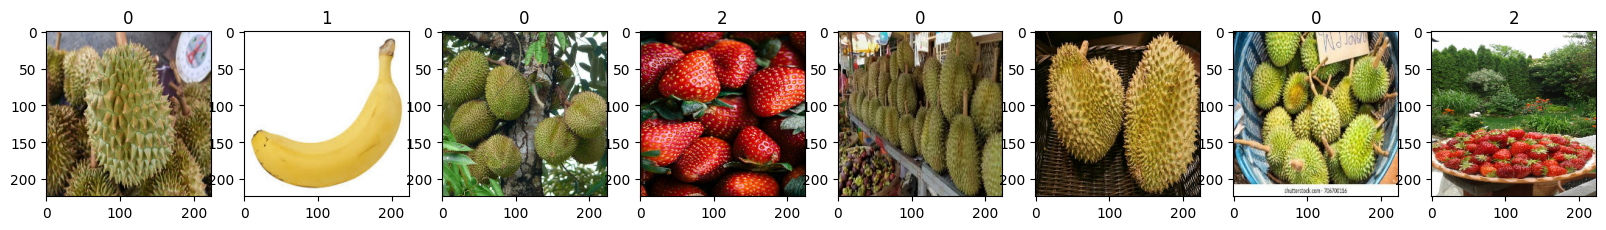

In [6]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x, y: (x/255.0, y))
print("Data type after normalization: {}".format(data.element_spec))
print("Data shape after normalization: {}".format(data.element_spec))
print("Jumlah data", len(data))

Data type after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Data shape after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 39


In [8]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

31
3
3


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Parameters
input_shape = (224, 224, 3)  # VGG expects 224x224x3 input
num_classes = 3  # Number of classes: strawberry, durian, banana

# Build VGG-like model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 178s 5s/step - accuracy: 0.3370 - loss: 1.1024 - val_accuracy: 0.2500 - val_loss: 1.1007
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.3386 - loss: 1.0934 - val_accuracy: 0.7500 - val_loss: 0.5402
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.5558 - loss: 0.8761 - val_accuracy: 0.5000 - val_loss: 0.8705
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.6336 - loss: 0.7426 - val_accuracy: 0.7083 - val_loss: 0.4906
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.7077 - loss: 0.5265 - val_accuracy: 0.6250 - val_loss: 0.6126
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.6971 - loss: 0.5438 - val_accuracy: 0.9583 - val_loss: 0.1776
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.9238 - loss: 0.3992 - val_accuracy: 0.7083 - val_loss: 0.6304
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9413 - loss: 0.3635 - val_accuracy: 0.8750 - v

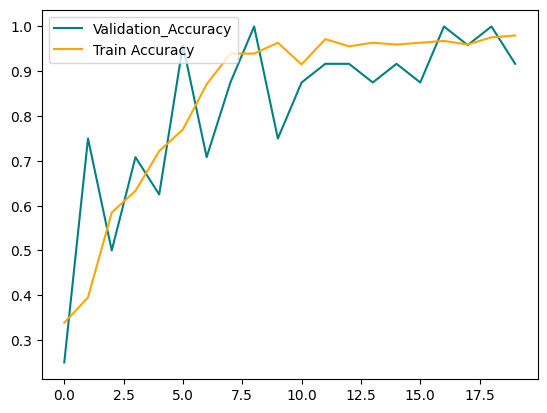

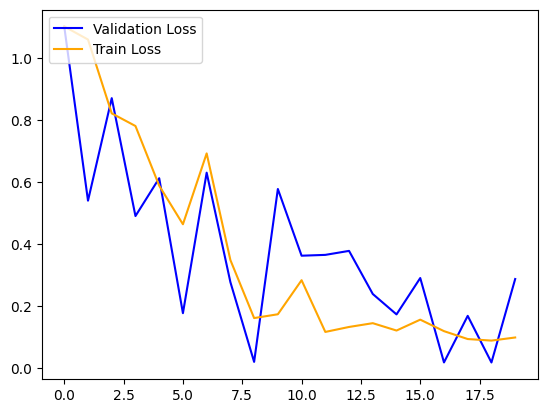

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 804ms/step - accuracy: 0.9115 - loss: 0.2816


[0.2860473394393921, 0.9166666865348816]

In [11]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation_Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label='Train Loss')
plt.legend(loc="upper left")
plt.show()

model.evaluate(test)

In [12]:
model.save('C:/Users/Asus/Downloads/PMDPM/TUBES ML2/vgg_model_buah.h5')

In [13]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

model = tf.keras.models.load_model('C:/Users/Asus/Downloads/PMDPM/TUBES ML2/vgg_model_buah.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


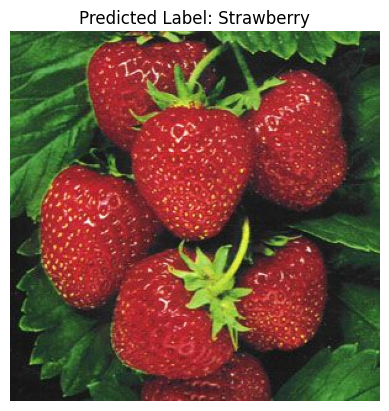

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[1.8485834e-12 3.3232531e-13 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


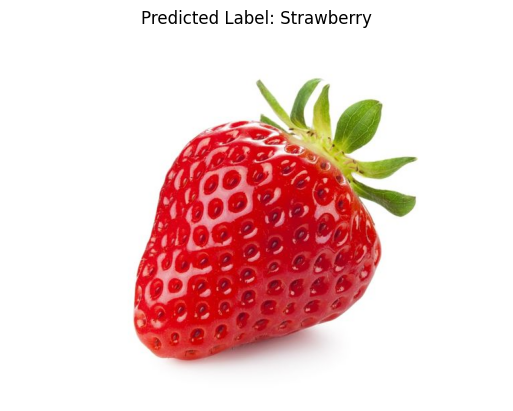

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[2.5926823e-17 1.0946435e-20 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


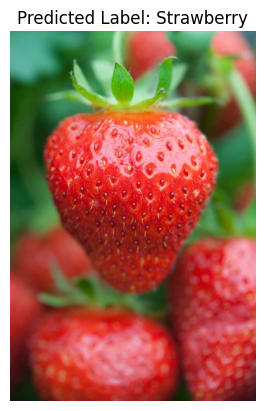

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[9.6805774e-17 5.7683502e-19 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


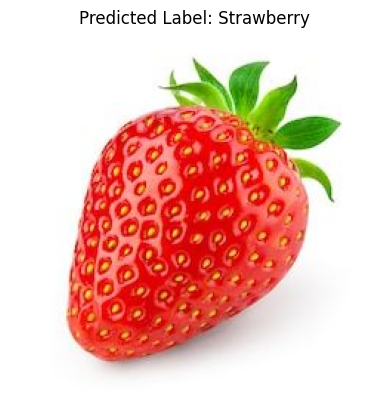

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[1.0647889e-19 5.3853243e-23 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


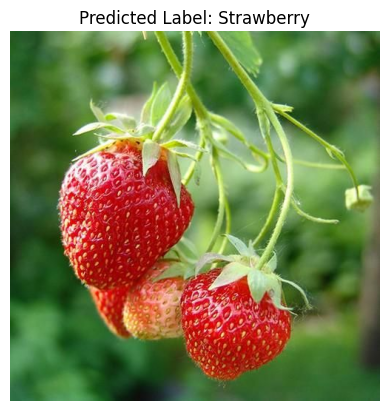

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[1.6118114e-10 1.5992175e-12 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


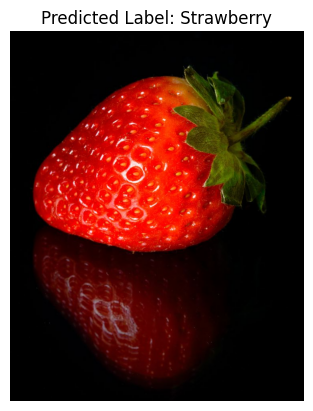

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[1.7770334e-19 6.4350774e-21 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


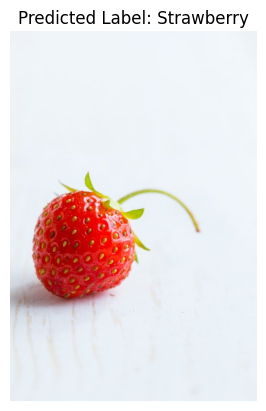

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[3.7264439e-07 9.8396287e-09 9.9999964e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


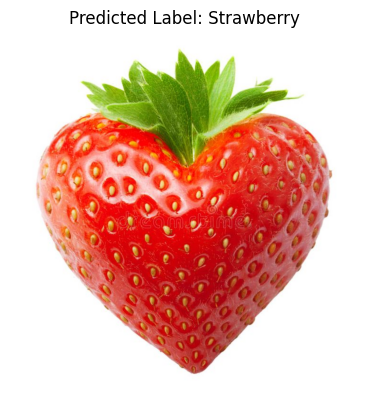

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[4.7926832e-20 1.7977783e-23 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


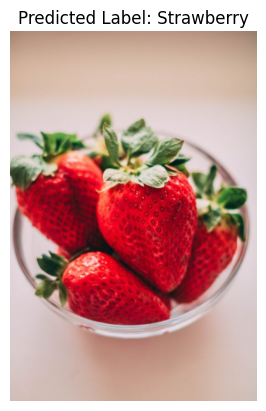

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[2.01112704e-17 1.01617555e-20 1.00000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


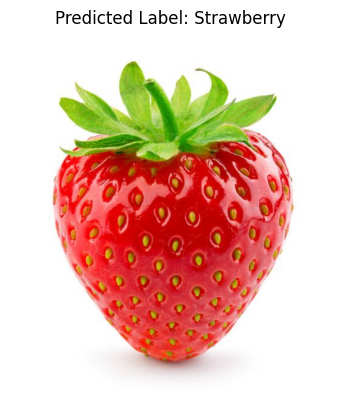

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[3.0822324e-19 7.4090384e-23 1.0000000e+00]]


In [14]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Strawberry'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (224,224))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


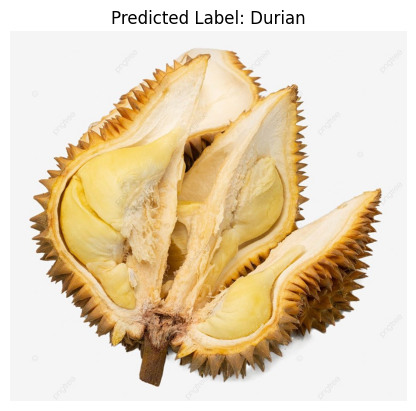

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.9738845  0.02494078 0.00117463]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


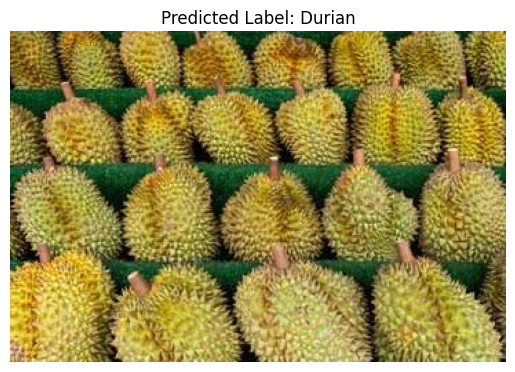

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.97390455 0.02492235 0.00117309]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


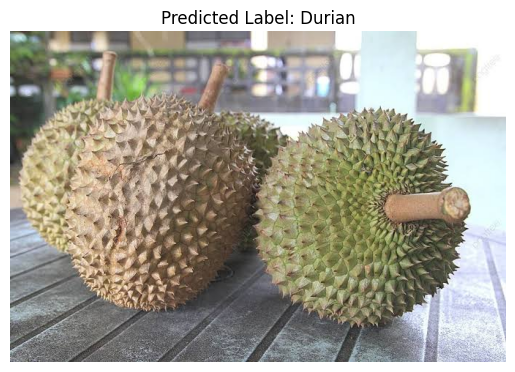

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.9738938  0.02493233 0.00117389]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


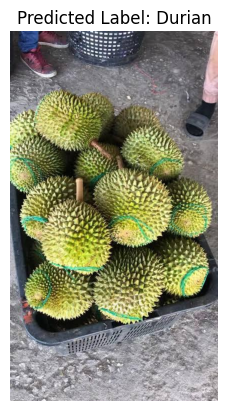

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.97390443 0.02492248 0.00117306]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


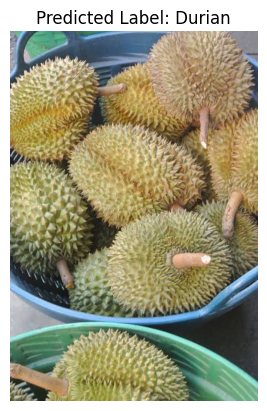

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.9739005  0.02492615 0.00117341]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


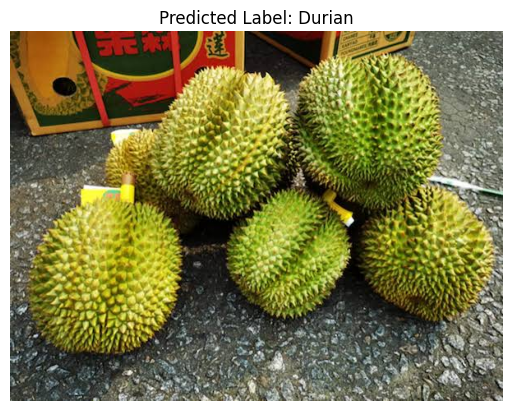

Predicted Label: Durian
Confidence: 80.73%
Pred : [[0.8073007  0.18891585 0.00378346]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


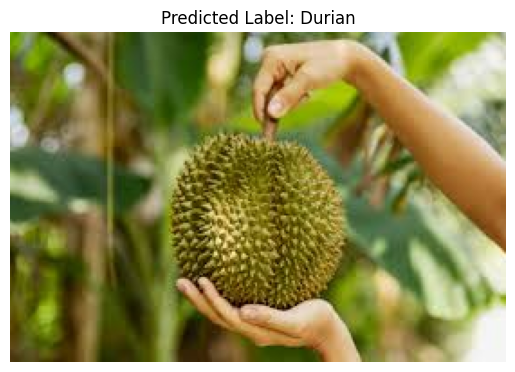

Predicted Label: Durian
Confidence: 97.24%
Pred : [[0.9723513  0.02633006 0.00131861]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


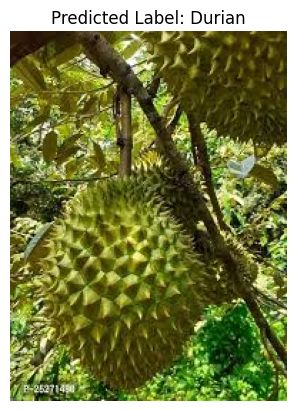

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.97390974 0.02491765 0.00117265]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


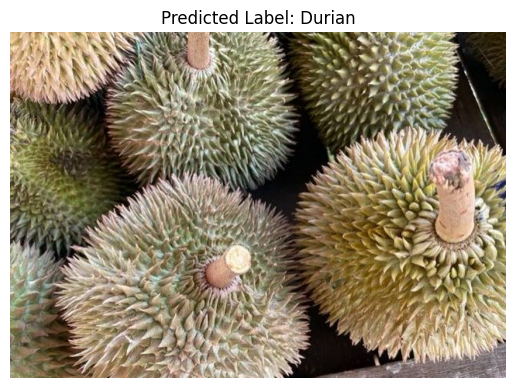

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.9739023  0.02492442 0.00117325]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


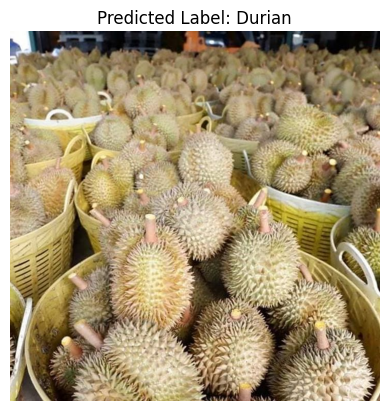

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.97389835 0.02492805 0.0011736 ]]


In [15]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Durian'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (224,224))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


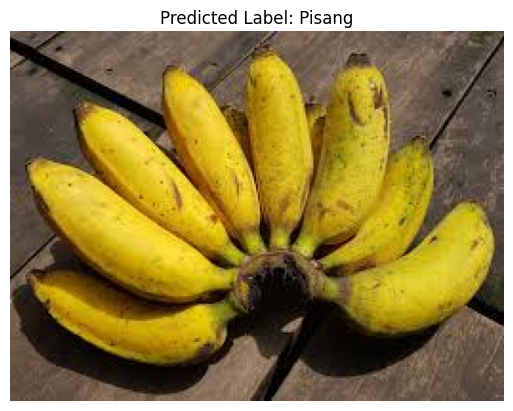

Predicted Label: Pisang
Confidence: 99.99%
Pred : [[5.8198642e-05 9.9994123e-01 5.2108703e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


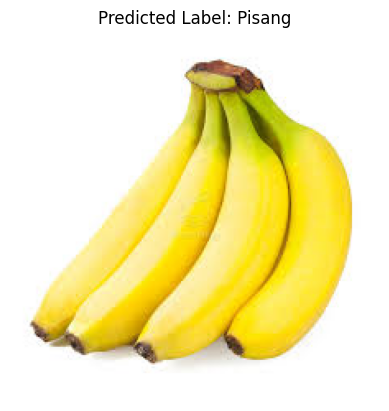

Predicted Label: Pisang
Confidence: 99.99%
Pred : [[1.3199139e-04 9.9986720e-01 8.0743825e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


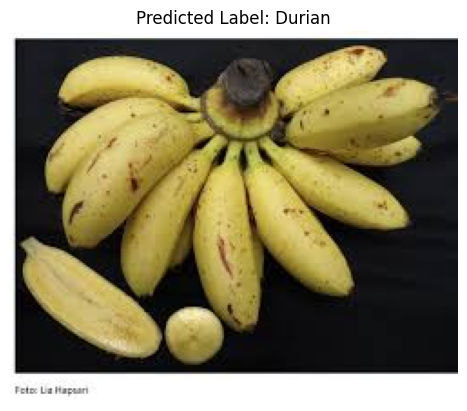

Predicted Label: Durian
Confidence: 91.66%
Pred : [[0.91663146 0.0805657  0.0028028 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


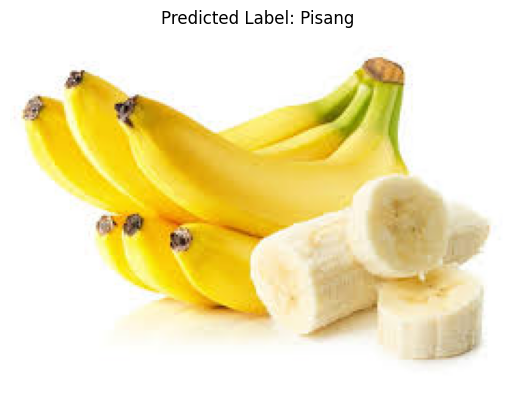

Predicted Label: Pisang
Confidence: 99.96%
Pred : [[3.6901693e-04 9.9962974e-01 1.1921937e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


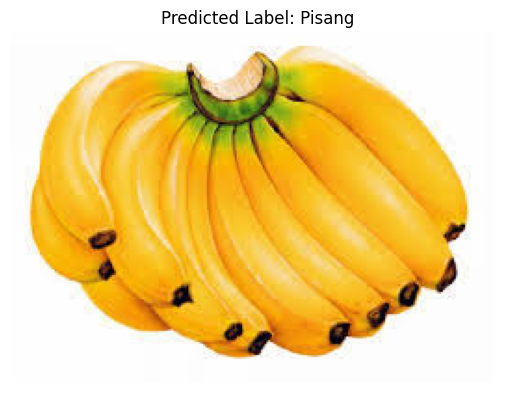

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[3.3074380e-06 9.9999666e-01 2.1824427e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


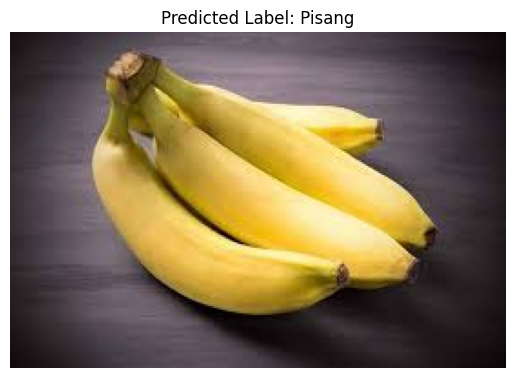

Predicted Label: Pisang
Confidence: 98.28%
Pred : [[1.6867198e-02 9.8276538e-01 3.6745204e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


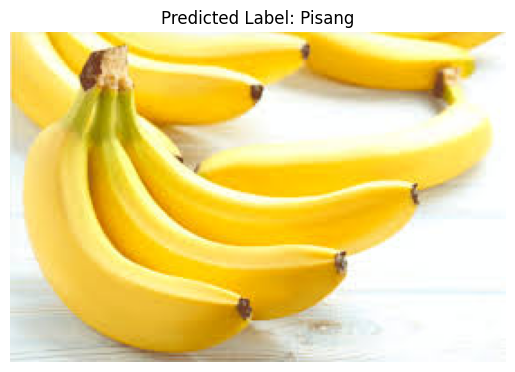

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[2.099006e-05 9.999789e-01 7.500277e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


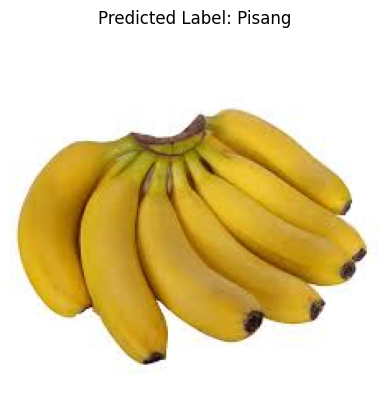

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[2.8931016e-05 9.9997091e-01 1.0414807e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


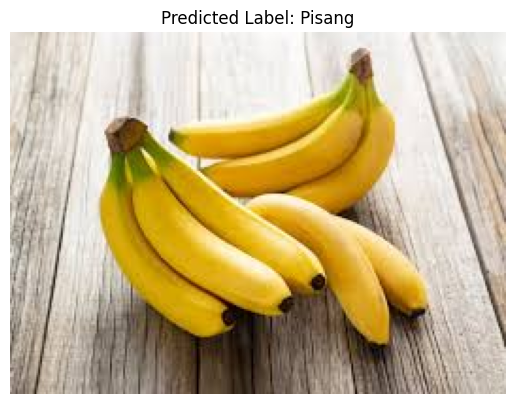

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[4.0711624e-05 9.9995840e-01 8.5745421e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


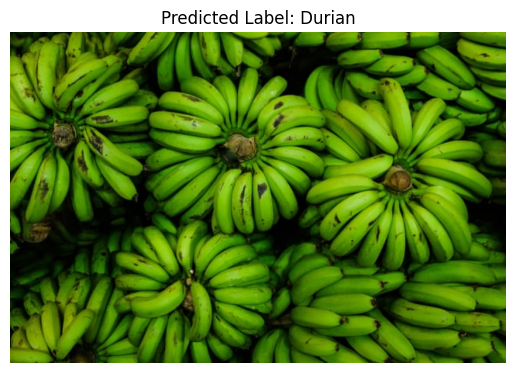

Predicted Label: Durian
Confidence: 97.39%
Pred : [[0.9739095  0.02491779 0.00117267]]


In [16]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Pisang'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (224,224))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')
